# 3교시 1. 다중 분류 방법

### 상관도 그래프

In [1]:
import pandas as pd

# 깃허브에 준비된 데이터를 가져옵니다.
!git clone https://github.com/taehojo/data.git

# 아이리스 데이터를 불러옵니다.
df = pd.read_csv('./data/iris3.csv')

fatal: destination path 'data' already exists and is not an empty directory.


In [2]:
# 첫 5줄을 봅니다.
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


다음의 세 종류 꽃의 특징을 담고 있습니다.

<img src="https://github.com/taehojo/fastcampus_ai/blob/master/data/img/03-01.png?raw=1" width="400"/>

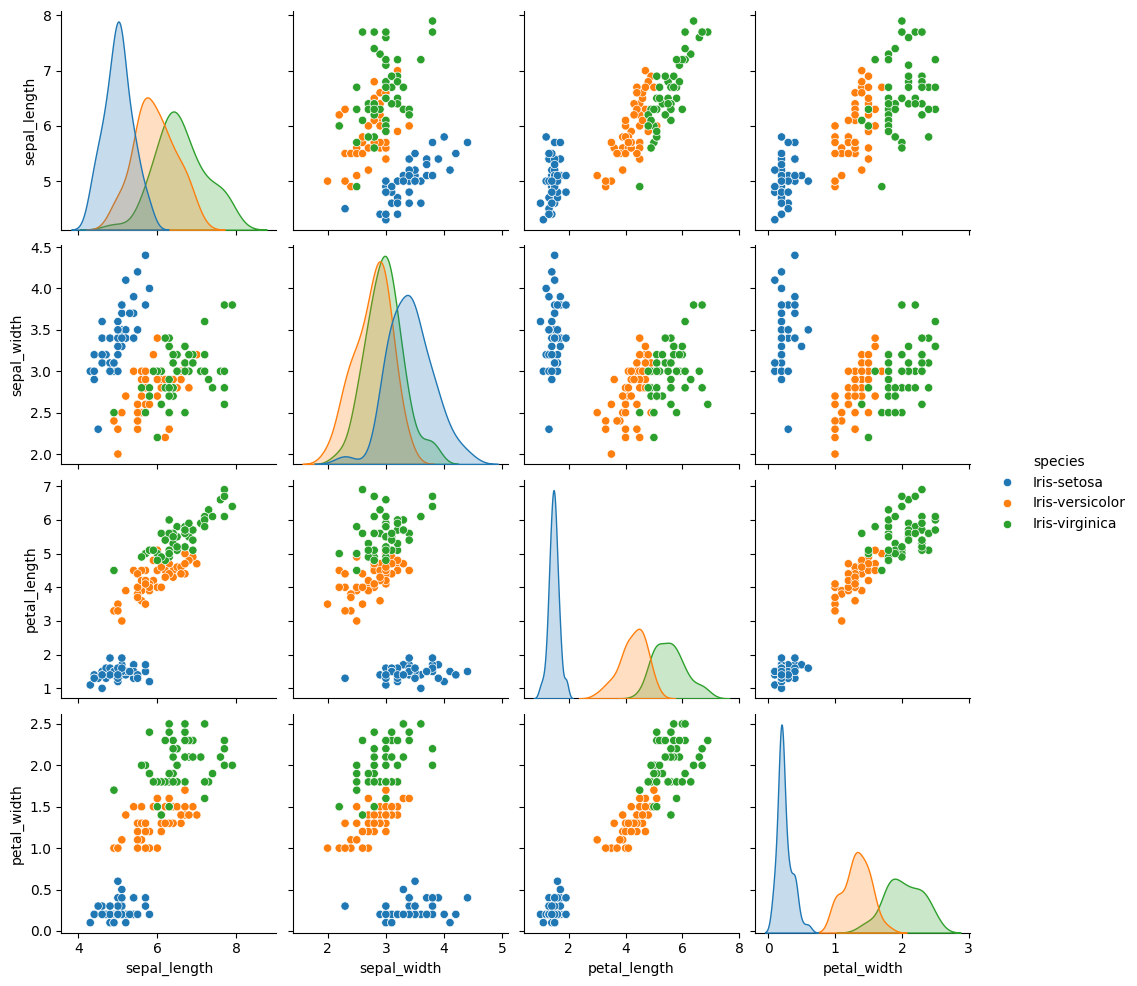

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# 그래프로 확인해 봅시다.
sns.pairplot(df, hue='species');
plt.show()

## 원-핫 인코딩
원-핫 인코딩에 대해 배워 봅시다.

<img src="https://github.com/taehojo/fastcampus_ai/blob/master/data/img/03-02.png?raw=1" alt="dl-structure" width="550"/>

In [4]:
# 속성을 X, 클래스를 y로 저장합니다.
X = df.iloc[:,0:4]
y = df.iloc[:,4]

# X와 y의 첫 5줄을 출력해 보겠습니다.
print(X[0:5])
print(y[0:5])

   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: species, dtype: object


In [5]:
# 원-핫 인코딩 처리를 합니다.
y = pd.get_dummies(y)

# 원-핫 인코딩 결과를 확인합니다.
print(y[0:5])

   Iris-setosa  Iris-versicolor  Iris-virginica
0         True            False           False
1         True            False           False
2         True            False           False
3         True            False           False
4         True            False           False


## 소프트맥스
소프트 맥스를 적용해 봅시다.  

<img src="https://github.com/taehojo/fastcampus_ai/blob/master/data/img/03-03.png?raw=1" width="550"/>

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 모델 설정
model = Sequential()
model.add(Dense(12,  input_dim=4, activation='relu'))
model.add(Dense(8,  activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

# 모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 실행
history=model.fit(X, y, epochs=30, batch_size=5)

/Users/hyeonjinho/.pyenv/versions/3.11.6/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 12)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 191 (764.00 B)

 Trainable params: 191 (764.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step - accuracy: 0.2773 - loss: 1.3727    
Epoch 2/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step - accuracy: 0.2951 - loss: 1.0969
Epoch 3/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 785us/step - accuracy: 0.4009 - loss: 0.9240
Epoch 4/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step - accuracy: 0.5634 - loss: 0.8538
Epoch 5/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 650us/step - accuracy: 0.8721 - loss: 0.7098
Epoch 6/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 631us/step - accuracy: 0.9148 - loss: 0.6165
Epoch 7/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 643us/step - accuracy: 0.7982 - loss: 0.5696
Epoch 8/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 669us/step - accuracy: 0.8767 - loss: 0.4977
Epoch 9/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 646us/step - accuracy: 0.9498 - loss: 0.4710
Epoch 10/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step - accuracy: 0.9096 - loss: 0.4499
Epoch 11/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 662us/step - accuracy: 0.8987 - loss: 0.4066
Epoch 12/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/

## [전체] 아이리스 품족 예측 실행

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 깃허브에 준비된 데이터를 가져옵니다. 앞에서 이미 가져왔으므로 주석 처리합니다. 5번 예제만 별도 실행 시 주석을 해제한 후 실행해주세요.
# !git clone https://github.com/taehojo/data.git

# 아이리스 데이터를 불러옵니다.
df = pd.read_csv('./data/iris3.csv')

# 속성을 X, 클래스를 y로 저장합니다.
X = df.iloc[:,0:4]
y = df.iloc[:,4]

# 원-핫 인코딩 처리를 합니다.
y = pd.get_dummies(y)

# 모델 설정
model = Sequential()
model.add(Dense(12,  input_dim=4, activation='relu'))
model.add(Dense(8,  activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

# 모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 실행
history=model.fit(X, y, epochs=30, batch_size=5)

/Users/hyeonjinho/.pyenv/versions/3.11.6/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 12)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 191 (764.00 B)

 Trainable params: 191 (764.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - accuracy: 0.2794 - loss: 2.7672    
Epoch 2/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 850us/step - accuracy: 0.3521 - loss: 1.3480
Epoch 3/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step - accuracy: 0.6563 - loss: 0.8309
Epoch 4/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 657us/step - accuracy: 0.7066 - loss: 0.6627
Epoch 5/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 655us/step - accuracy: 0.5946 - loss: 0.6813
Epoch 6/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step - accuracy: 0.6633 - loss: 0.5788
Epoch 7/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step - accuracy: 0.6684 - loss: 0.5485
Epoch 8/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 646us/step - accuracy: 0.6835 - loss: 0.4917
Epoch 9/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step - accuracy: 0.7373 - loss: 0.4686
Epoch 10/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step - accuracy: 0.7844 - loss: 0.4293
Epoch 11/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step - accuracy: 0.9478 - loss: 0.4146
Epoch 12/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 647us/